# Machine learning introduction

## 0. Imports

In [103]:
import pandas as pd
import numpy as np
import sklearn
import lightgbm as lgb
import matplotlib.pyplot as plt
import scipy
import statsmodels
import seaborn as sns
import zipfile
import json
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## 1. Introduction

Запишите свои ответы во вступительной части вашего блокнота.
1. Для начала напишите, пожалуйста, 5 примеров применения методов ML в жизни. В чем преимущество использования методов машинного обучения в каждом из ваших примеров?
2. Используйте классификацию задач во введении, чтобы решить, какой класс вы можете присвоить задачам из таблицы выше и 5 приведенным вами примерам.
3. Подумайте и предположите, в чем разница между мультиклассом и мультиметкой.
4. Является ли теоретический пример с ценами на жилье классификацией регрессионной проблемы? Можно ли свести задачу регрессии к классификации?

1) Примеры для применения методов машиного обучения
- выиграет футбольная команда или нет
- сколько будет стоить моя квартира через 3 года
- распределить группу программистов на категории(Frontend, Backend, аналитик данных и т.д.) исходя из их hadr skills
- определить прравило которое скажет, что если человек покупает определенный набор продуктов в магазине, то он скорее всего купит молоко (Например человек у которого в продуктовой корзине есть яйца, сыр, кофе и хлеб - скорее всего купит и молоко)
- определить звонит ли мошеник или нет

2)
|  | Задача | метод ML |
| ----- | ------ | ------ |
| 1 | Предсказание цены дома | Обучение с учителем - задача регрессии |
| 2 | Предсказать вернет клиент кредит или нет | Обучение с учителем - задача бинарной классификации |
| 3 | Предсказать поможет ли лекарство пациенту | Обучение с учителем - задача бинарной классификации |
| 4 | Предсказать какое лекарство поможет пациенту | Обучение с учителем - задача мультиклассовой классификации |
| 5 | Выберать сегмент клиентов для промо-коммуникации | Обучение без учителя - Задача ассоциации |
| 6 | Распознавать бракованную продукцию на производственной линии (по сканам фотографии) | Обучение с учителем - задача бинарной классификации |
| 7 | Решить, как разместить товары на полке в магазине. | Обучение без учителя - задача класстеризации |
| 8 | Поиск сайтов по вводу текстового запроса | Обучение с учителем - задача мультиклассовой классификации |
| 9 | Разделите клиентов магазина на сегменты, чтобы понять различия в их поведении. | Обучение без учителя - задача класстеризации |
| 10 | Обнаружение аномалий в трафике сайта | Обучение без учителя - Задача ассоциации или Обучение с учителем - задача бинарной классификации |
| 11 | Предсказать выиграет футбольная команда или нет | Обучение с учителем - задача бинарной классификации |
| 12 | Предсказать сколько будет стоить моя квартира через 3 года | Обучение с учителем - задача регрессии |
| 13 | распределить группу программистов на категории(Frontend, Backend, аналитик данных и т.д.) исходя из их hadr skills | Обучение без учителя - задача класстеризации |
| 14 | определить прравило которое скажет, что если человек покупает определенный набор продуктов в магазине, то он скорее всего купит молоко (Например человек у которого в продуктовой корзине есть яйца, сыр, кофе и хлеб - скорее всего купит и молоко) | Обучение без учителя - Задача ассоциации |
| 15 | определить звонит ли мошеник или нет | Обучение с учителем - задача бинарной классификации



## 2. Вводный анализ данных

1. Импортируйте библиотеки pandas , numpy , sklearn , Lightgbm , scipy , statsmodels , matplotlib , seaborn . Используйте pip install , если это необходимо
2. Загрузите данные из [kaggle](https://www.kaggle.com/competitions/two-sigma-connect-rental-listing-inquiries/data) с помощью pandas . Вам нужны только данные таблицы и train.json.
3. Каков размер ваших данных?
4. Распечатайте список столбцов. Какой столбец является целевым?
5. Проведите быстрый анализ данных: используйте методы info() , описать() , corr() . Объясните результаты выходных данных. Есть ли пустые столбцы?
6. Мы будем работать только с тремя функциями: «ванные комнаты», «спальни», «уровень интереса» и с целевым столбцом «цена». Создайте фрейм данных только с этими столбцами.

In [104]:
# 2
d = None  
data = None  
with zipfile.ZipFile("data/train.json.zip", "r") as z:
    for filename in z.namelist():  
        print(filename)  
        with z.open(filename) as f:  
            data = f.read()  
            d = json.loads(data.decode("utf-8"))

train.json


In [105]:
# 3
df = pd.DataFrame.from_dict(d)
df.size

740280

In [106]:
# 4
list(df.columns.values )
# целевым является столбец 'price'

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'interest_level']

In [107]:
# 5
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [108]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [109]:
df[['bathrooms',
 'bedrooms',
 'latitude',
 'listing_id',
 'longitude',
 'price']].corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


#### Разяснение.
- Датасет содержит 49 532 строк данных, 14 признаков (из них 5 числовых) и целевое значение - 'price'
- Количество ванных и спальных комнат наиболее коррелирует с ценной

In [110]:
# 6
df = df[['bathrooms',
 'bedrooms',
 'price',
 'interest_level']].reset_index()
df

,index,bathrooms,bedrooms,price,interest_level
0,4,1.0,1,2400,medium
1,6,1.0,2,3800,low
2,9,1.0,2,3495,medium
3,10,1.5,3,3000,medium
4,15,1.0,0,2795,low
...,...,...,...,...,...
49347,124000,1.0,3,2800,low
49348,124002,1.0,2,2395,medium
49349,124004,1.0,1,1850,medium
49350,124008,1.0,2,4195,medium


## 3. Статистический анализ данных

1. Чтобы начать статистический анализ данных, мы рекомендуем вам освежить базовые знания статистики, такие как среднее значение / медиана / мода / дисперсия / стандартное отклонение. Также вы можете свободно работать с распределениями (Дискретное равномерное распределение, Распределение Бернулли, Биномиальное распределение, Распределение Пуассона, Нормальное распределение, Экспоненциальное распределение). Убедитесь, что вы знаете определения выбросов, процентилей и конфиденциальных интервалов. Статья будет позже.
2. 
Сделайте быстрый вывод с помощью этой[статьи](https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf)и . Пожалуйста, обратите внимание на такие аспекты, как распределения и гистограммы, коробчатая диаграмма, выбросы, функция плотности ядра Y — объектом.

### 3.3 Целевой анализ.
- Постройте гистограмму, чтобы понять распределение цели. Все ясно?
- Следующий шаг — boxplot(). Что вы можете сказать о цели? Есть ли какие-либо выбросы?
- Удалите строки, выходящие за пределы 1 и 99 процентилей целевого столбца.
- Снова постройте гистограмму цены. Объясните результат.

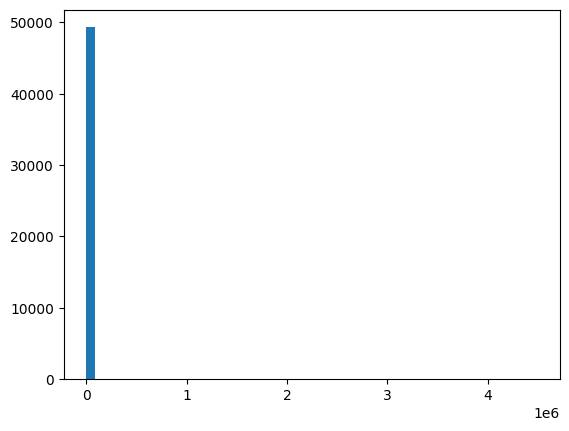

In [111]:
plt.hist(df['price'], bins=50)
plt.show()

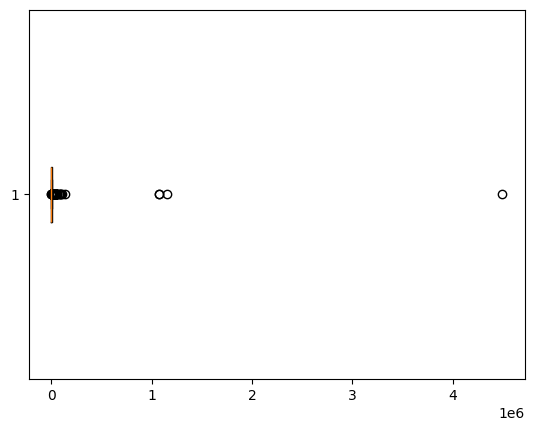

In [112]:
plt.boxplot(df['price'], vert=False)
plt.show()

значение нижнего процентиля(0.01): 1475.0
значение верхнего процентиля(0.99): 13000.0


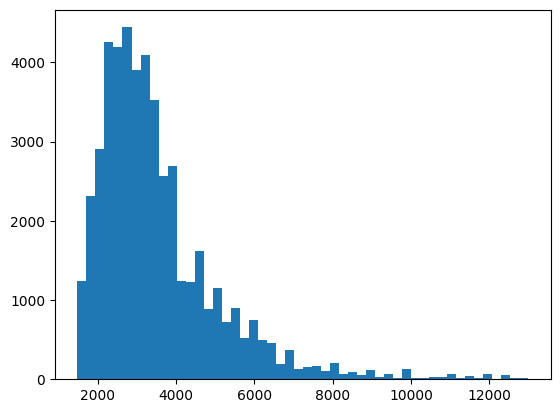

после удаления выбросов гситограмма стала более понятной


In [113]:
low_quantile = df['price'].quantile(0.01)
up_quantile = df['price'].quantile(0.99)
print(f'значение нижнего процентиля(0.01): {low_quantile}')
print(f'значение верхнего процентиля(0.99): {up_quantile}')

# Оставляем строки где значение находятся между данными процентилями
df_new = df[(df['price'] > low_quantile)&(df['price'] < up_quantile)]

# снова рисуем гистограмму
plt.hist(df_new['price'], bins=50)
plt.show()
print('после удаления выбросов гситограмма стала более понятной')

### 3.4. Анализ особенностей
- Каков тип столбца «interest_level»?
- Распечатайте значения этого столбца. Сколько элементов содержит каждое значение?
- Расшифруйте эти значения. Например, вы можете заменить каждое значение на 0, 1 или 2.
- Постройте гистограммы для объектов «ванные комнаты», «спальни». Есть ли выбросы?

In [114]:
print('Тип данных столбца `interest_level`:', df['interest_level'].dtypes)

Тип данных столбца `interest_level`: object


In [115]:
df['interest_level'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [116]:
categorical_data = {'low': 0, 'medium':1, 'high':2}
df_new['interest_level'] = df_new['interest_level'].map(categorical_data)
df_new.head()

,index,bathrooms,bedrooms,price,interest_level
0,4,1.0,1,2400,1
1,6,1.0,2,3800,0
2,9,1.0,2,3495,1
3,10,1.5,3,3000,1
4,15,1.0,0,2795,0


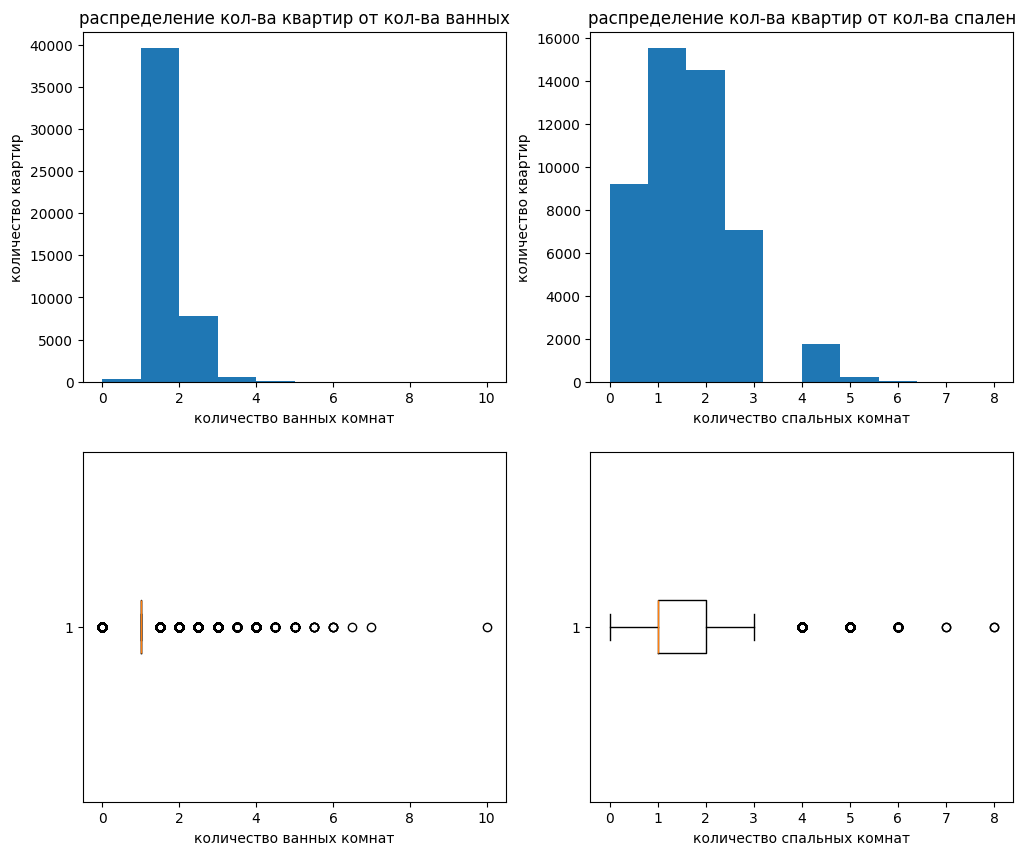

In [117]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.hist(df_new['bathrooms'])
plt.title('распределение кол-ва квартир от кол-ва ванных')
plt.xlabel('количество ванных комнат')
plt.ylabel('количество квартир')

plt.subplot(222)
plt.hist(df_new['bedrooms'])
plt.title('распределение кол-ва квартир от кол-ва спален')
plt.xlabel('количество спальных комнат')
plt.ylabel('количество квартир')

plt.subplot(223)
plt.boxplot(df['bathrooms'], vert=False)
plt.xlabel('количество ванных комнат')

plt.subplot(224)
plt.boxplot(df['bedrooms'], vert=False)
plt.xlabel('количество спальных комнат')

plt.show()
# Впринципе выбросов нет, заметно, что количество квартир на рынке с большим количество ванных комнат и спален значительно меньше
# Преобладают квартиры с одной ванной и одной спальной комнатой

### 3.5. Комплексный анализ
- Постройте матрицу корреляции, чтобы понять корреляцию между функциями и целью. Постройте график тепловой карты для корреляционной матрицы. Есть ли корреляция?
- Используйте диаграмму рассеяния, чтобы визуализировать корреляцию между функциями и целью. Вы должны вернуть 3 графика, где ось X является целевой, а ось Y — объектом.

In [118]:
matrix = df_new[['bathrooms', 'bedrooms', 'interest_level', 'price']].corr()
matrix

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.517200,1.000000,0.051282,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.199652
price,0.670808,0.547310,-0.199652,1.000000


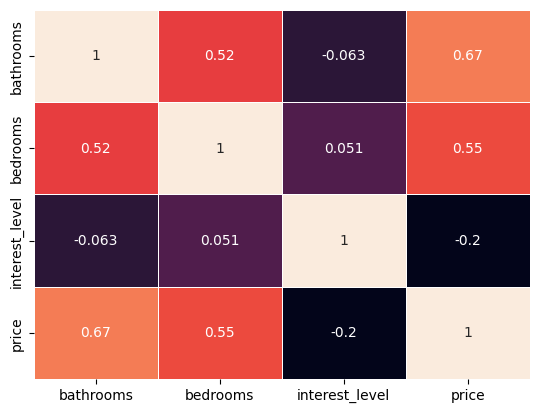

In [119]:
df = df_new.drop(df_new.columns[[0]], axis=1,inplace=False)
sns.heatmap(matrix, linewidths=.5, annot=True, cbar=False)
plt.show()
# есть корреляция для количества ванных комнат и количества спален

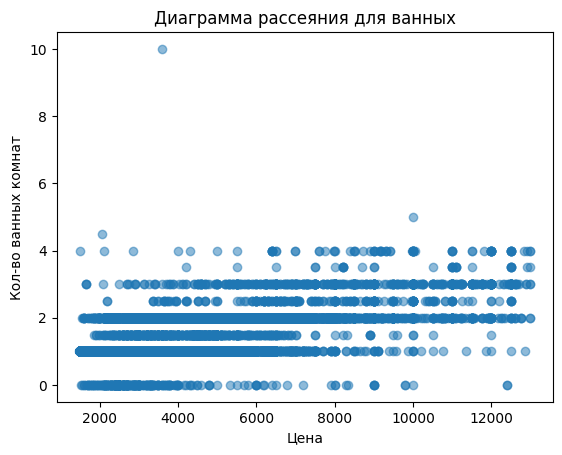

In [120]:
plt.scatter (df['price'], df['bathrooms'], alpha=0.5)
plt.title('Диаграмма рассеяния для ванных')
plt.xlabel('Цена')
plt.ylabel('Кол-во ванных комнат')
plt.show()

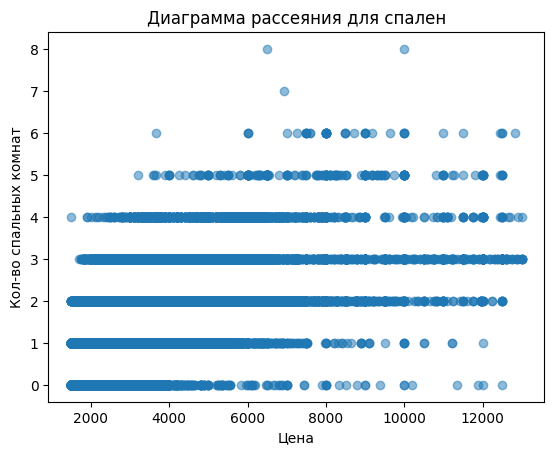

In [121]:
plt.scatter (df['price'], df['bedrooms'], alpha=0.5)
plt.title('Диаграмма рассеяния для спален')
plt.xlabel('Цена')
plt.ylabel('Кол-во спальных комнат')
plt.show()

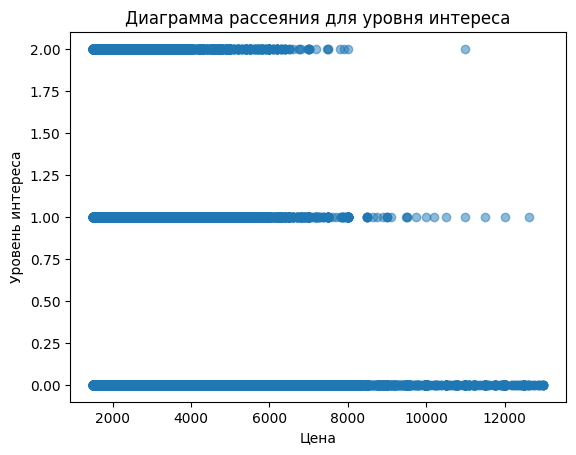

In [122]:
plt.scatter (df['price'], df['interest_level'], alpha=0.5)
plt.title('Диаграмма рассеяния для уровня интереса')
plt.xlabel('Цена')
plt.ylabel('Уровень интереса')
plt.show()

## 4. Генерация новых признаков
4.1. Этот шаг очень широкий. Вы можете создать все функции, которые захотите. Например, вы можете добавить 3 новых объекта, которые будут иметь значения возведенные в степень других призноков: «bathrooms_squared», «bedrooms_squared», «interest_level_squared». Постройте корреляционную матрицу с новыми функциями. Являются ли новые функции более коррелирующими с целевыми, чем с базовыми функциями?
- Для обучения модели здесь мы не будем использовать ваши новые признаки. Запомните этот пример и используйте его в лекции 2.
- Прочтите эту информацию о PolynomialFeatures: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html.
- Чтобы использовать PolynomialFeatures, нам сначала нужно разделить данные для обучения и тестирования выборок. Мы уже сделали это для вас, пожалуйста, прочитайте данные поезда и испытаний.
- Инициализируйте PolynomialFeatures() со степенью 10.
- Примените PolynomialFeatures(), чтобы подогнать и преобразовать данные обучения и испытаний.

In [123]:
df_square = df.copy()
df_square['bathrooms_squared'] = df['bathrooms'] ** 2
df_square['bedrooms_squared'] = df['bedrooms'] ** 2
df_square['interest_level_squared'] = df['interest_level'] ** 2
matrix = df_square[['bathrooms', 'bedrooms', 'interest_level', 'bathrooms_squared', 'bedrooms_squared', 'interest_level_squared', 'price']].corr()
matrix

,bathrooms,bedrooms,interest_level,bathrooms_squared,bedrooms_squared,interest_level_squared,price
bathrooms,1.000000,0.517200,-0.062819,0.955906,0.548426,-0.058710,0.670808
bedrooms,0.517200,1.000000,0.051282,0.478497,0.928282,0.040125,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.067757,0.047048,0.943959,-0.199652
bathrooms_squared,0.955906,0.478497,-0.067757,1.000000,0.521951,-0.061563,0.646949
bedrooms_squared,0.548426,0.928282,0.047048,0.521951,1.000000,0.036408,0.544612
interest_level_squared,-0.058710,0.040125,0.943959,-0.061563,0.036408,1.000000,-0.182283
price,0.670808,0.547310,-0.199652,0.646949,0.544612,-0.182283,1.000000


<Axes: >

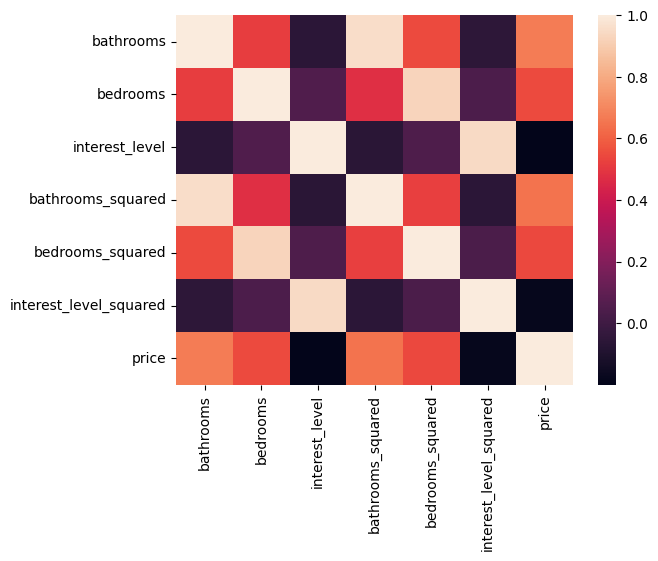

In [124]:
sns.heatmap(matrix)

Базовые функции меньше коррелируют (ванны) или корреляция практически не меняется (для остальных)

In [125]:
X = df[['bathrooms', 'bedrooms', 'interest_level']]
y = df['price']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=21)
print(f'Размер `X_train`: {X_train.shape}, y_train: {y_train.shape}')
print(f'Размер `X_test`: {X_test.shape}, y_test: {y_test.shape}')

Размер `X_train`: (38674, 3), y_train: (38674,)
Размер `X_test`: (9669, 3), y_test: (9669,)


In [126]:
poly = sklearn.preprocessing.PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(f'Размер `X_train_poly`: {X_train_poly.shape}')
print(f'Размер `X_test_poly`: {X_test_poly.shape}')

Размер `X_train_poly`: (38674, 286)
Размер `X_test_poly`: (9669, 286)


## 5. Теперь вам нужно обучить 3 модели: линейную регрессию, дерево решений и нативную модель. Мы будем использовать его как черные ящики без глубокого понимания.

### 5.1. Таблица результатов.
Создайте два пустых DataFrames pandas со столбцами «model», «train», «test». Назовем первый result_MAE, а второй result_RMSE. Заполним эти таблицы результатами моделей.

In [127]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test']) # Средняя абсолютная ошибка
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test']) # Корень среднеквадратичной ошибки

### 5.2. Линейная регрессия
- Инициализируйте линейную регрессию из sklearn без параметров.
- Подберите свою модель и делайте прогнозы по функциям обучения и тестирования. Сохраните его как новые столбцы в данных.
- Рассчитайте MAE (среднюю абсолютную ошибку) для поездов и тестовых целей.
- Рассчитать RMSE (среднеквадратическую ошибку) для поездов и тестовых целей
- Вставьте свои показатели в таблицы result_MAE и result_RMSE с именем модели «линейная_регрессия».

In [128]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_train_predict = lin_reg.predict(X_train_poly)
y_test_predict = lin_reg.predict(X_test_poly)

In [129]:
mae_train = mean_absolute_error(y_train, y_train_predict)
mae_test = mean_absolute_error(y_test, y_test_predict)

In [130]:
rmse_train = root_mean_squared_error(y_train, y_train_predict)
rmse_test = root_mean_squared_error(y_test, y_test_predict)

In [131]:
result_MAE.loc[len(result_MAE.index)] = ['linreg', mae_train, mae_test]
result_MAE

,model,train,test
0,linreg,718.825047,1374.255664


In [132]:
result_RMSE.loc[len(result_RMSE.index)] = ['linreg', rmse_train, rmse_test]
result_RMSE

,model,train,test
0,linreg,1025.483464,63318.921228


### 5.3. Древо решений
- Инициализировать регрессор дерева решений из sklearn с фиксированным random_state=42
- Установите его на характеристики поезда и цель обучения, а также делайте прогнозы по функциям поезда и тестирования. Сохраните его как новый столбец в данных.
- Рассчитайте MAE (среднюю абсолютную ошибку) для поездов и тестовых целей.
- Рассчитать RMSE (среднеквадратическую ошибку) для поездов и тестовых целей
- Вставьте свои показатели в таблицы result_MAE и result_RMSE с именем модели «decision_tree».

In [133]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_poly, y_train)
y_train_predict = tree.predict(X_train_poly)
y_test_predict = tree.predict(X_test_poly)

In [134]:
mae_train = mean_absolute_error(y_train, y_train_predict)
mae_test = mean_absolute_error(y_test, y_test_predict)

In [135]:
rmse_train = root_mean_squared_error(y_train, y_train_predict)
rmse_test = root_mean_squared_error(y_test, y_test_predict)

In [136]:
result_MAE.loc[len(result_MAE.index)] = ['tree', mae_train, mae_test]
result_MAE

,model,train,test
0,linreg,718.825047,1374.255664
1,tree,718.825041,727.070811


In [137]:
result_RMSE.loc[len(result_RMSE.index)] = ['tree', rmse_train, rmse_test]
result_RMSE

,model,train,test
0,linreg,1025.483464,63318.921228
1,tree,1025.483464,1032.541333


### 5.4. Нативные модели
- Рассчитайте среднее и медианное значение «цены» для данных поездов и испытаний и создайте столбцы с этими значениями.
- Рассчитайте MAE на поезде и проверьте целевые показатели между вашими целевыми и рассчитанными средними и медианными значениями.
- Рассчитайте RMSE для поезда и проверьте целевые показатели между вашими целевыми и рассчитанными средними и медианными значениями.
- Вставьте свои показатели в таблицы result_MAE и result_RMSE с именами моделей «native_mean» и «native_median».

In [138]:
native_train = pd.DataFrame(data=y_train)
native_train['mean'] = native_train.price.mean()
native_train['median'] = native_train.price.median()
native_train

,price,mean,median
44088,3200,3535.823783,3150.0
26961,4650,3535.823783,3150.0
39739,5000,3535.823783,3150.0
3836,5500,3535.823783,3150.0
19524,2350,3535.823783,3150.0
...,...,...,...
16779,3750,3535.823783,3150.0
9165,7000,3535.823783,3150.0
6080,3800,3535.823783,3150.0
5454,2895,3535.823783,3150.0


In [139]:
native_test = pd.DataFrame(data=y_test)
native_test['mean'] = native_test.price.mean()
native_test['median'] = native_test.price.median()
native_test

,price,mean,median
15316,2650,3532.541111,3147.0
29020,4000,3532.541111,3147.0
16422,3715,3532.541111,3147.0
33071,4700,3532.541111,3147.0
20415,10680,3532.541111,3147.0
...,...,...,...
46375,5500,3532.541111,3147.0
13009,2900,3532.541111,3147.0
4297,2600,3532.541111,3147.0
20420,2050,3532.541111,3147.0


In [140]:
mae_train_mean = mean_absolute_error(y_train, native_train['mean'])
mae_test_mean = mean_absolute_error(y_test, native_test['mean'])
mae_train_median = mean_absolute_error(y_train, native_train['median'])
mae_test_median = mean_absolute_error(y_test, native_test['median'])

result_MAE.loc[len(result_MAE.index)] = ['mean', mae_train_mean, mae_test_mean]
result_MAE.loc[len(result_MAE.index)] = ['median', mae_train_median, mae_test_median]
result_MAE

,model,train,test
0,linreg,718.825047,1374.255664
1,tree,718.825041,727.070811
2,mean,1131.815443,1144.533690
3,median,1079.734162,1092.166408


In [141]:
rmse_train_mean = root_mean_squared_error(y_train, native_train['mean'])
rmse_test_mean = root_mean_squared_error(y_test, native_test['mean'])
rmse_train_median = root_mean_squared_error(y_train, native_train['median'])
rmse_test_median = root_mean_squared_error(y_test, native_test['median'])

result_RMSE.loc[len(result_RMSE.index)] = ['mean', rmse_train_mean, rmse_test_mean]
result_RMSE.loc[len(result_RMSE.index)] = ['median', rmse_train_median, rmse_test_median]
result_RMSE

,model,train,test
0,linreg,1025.483464,63318.921228
1,tree,1025.483464,1032.541333
2,mean,1580.460676,1606.034024
3,median,1626.873056,1651.661962


### 5.5. Сравнить результаты
Распечатайте итоговые таблицы result_MAE и result_RMSE.
Какая модель лучшая?

In [142]:
result_MAE

,model,train,test
0,linreg,718.825047,1374.255664
1,tree,718.825041,727.070811
2,mean,1131.815443,1144.533690
3,median,1079.734162,1092.166408


In [143]:
result_RMSE

,model,train,test
0,linreg,1025.483464,63318.921228
1,tree,1025.483464,1032.541333
2,mean,1580.460676,1606.034024
3,median,1626.873056,1651.661962


ANSWER: Для тренировочной выборки лучше всех себя показали модели `linreg` и `tree`. Однако на тестовой выборке наилучший результат показал `tree`. Поэтому Считаю, что `tree` - лучшая модель.